In [8]:
import numpy as np


In [9]:
import pandas as pd

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_csv(r"C:\Users\harshit\OneDrive\Desktop\mydata\bvc\fer2013.csv")
print(data)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [12]:
data.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [14]:
X = data.pixels.apply(lambda i:np.array(i.split(' ')).reshape(48,48,1).astype('float'))/255


In [15]:
X = np.stack(X)
X

array([[[[0.2745098 ],
         [0.31372549],
         [0.32156863],
         ...,
         [0.20392157],
         [0.16862745],
         [0.16078431]],

        [[0.25490196],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862745],
         [0.21176471],
         ...,
         [0.19215686],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.16470588],
         ...,
         [0.28235294],
         [0.21960784],
         [0.16862745]],

        [[0.30196078],
         [0.32156863],
         [0.30980392],
         ...,
         [0.41176471],
         [0.2745098 ],
         [0.18039216]],

        [[0.30196078],
         [0.28235294],
         [0.32941176],
         ...,
         [0.41568627],
         [0.42745098],
         [0.32156863]]],


       [[[0.59215686],
         [0.58823529],
         [0.57

In [16]:
y = data['emotion']
y
!pip install sklearn

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
y_train = keras.utils.to_categorical(y_train,7)
y_test = keras.utils.to_categorical(y_test,7)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [19]:
input_shape = (48,48,1)

model = keras.Sequential(
        [
        keras.layers.InputLayer(input_shape=input_shape),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.BatchNormalization(),
            
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.BatchNormalization(),
    
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.BatchNormalization(),
    
        keras.layers.Conv2D(512,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.BatchNormalization(),
    
        keras.layers.Flatten(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(7,activation="softmax")
        ]
     ) 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         2

In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=15)

Train on 28709 samples
Epoch 1/15
28709/28709 [==============================] - 35s 1ms/sample - loss: 1.6937 - accuracy: 0.3927
Epoch 2/15
28709/28709 [==============================] - 20s 690us/sample - loss: 1.2797 - accuracy: 0.5223
Epoch 3/15
28709/28709 [==============================] - 20s 691us/sample - loss: 1.1222 - accuracy: 0.5799
Epoch 4/15
28709/28709 [==============================] - 20s 695us/sample - loss: 0.9925 - accuracy: 0.6303
Epoch 5/15
28709/28709 [==============================] - 20s 703us/sample - loss: 0.8567 - accuracy: 0.6824- loss: 0.8567 - accuracy: 0.
Epoch 6/15
28709/28709 [==============================] - 20s 696us/sample - loss: 0.6867 - accuracy: 0.7513- loss:
Epoch 7/15
28709/28709 [==============================] - 20s 699us/sample - loss: 0.5229 - accuracy: 0.8138
Epoch 8/15
28709/28709 [==============================] - 20s 699us/sample - loss: 0.3873 - accuracy: 0.8635
Epoch 9/15
28709/28709 [==============================] - 20s 695us/sam

In [22]:
model.evaluate(x_train,y_train,verbose=0)

[0.10464787394484384, 0.9704971]

In [23]:
y_predicted = model.predict(x_test)
        

In [24]:
y_predicted[0]


array([9.74891122e-07, 1.37020983e-09, 1.49520665e-05, 9.99981403e-01,
       1.05628928e-08, 1.57648947e-06, 1.14281409e-06], dtype=float32)

In [25]:
np.argmax(y_predicted[0])

3

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted ]

In [27]:
y_predicted_labels[:5]

[3, 2, 0, 5, 5]

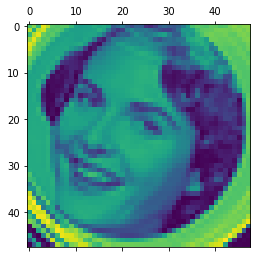

In [28]:
plt.matshow(x_test[0])


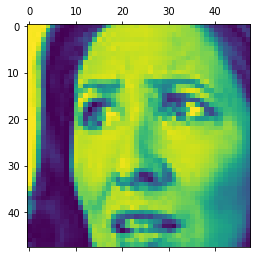

In [29]:
plt.matshow(x_test[1])

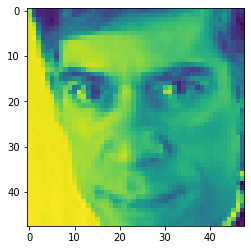

In [30]:
plt.imshow(x_train[1].reshape(48,48))

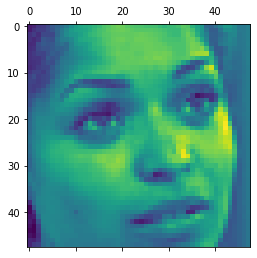

In [31]:
plt.matshow(x_test[2])

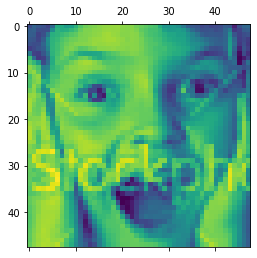

In [32]:
plt.matshow(x_test[3])

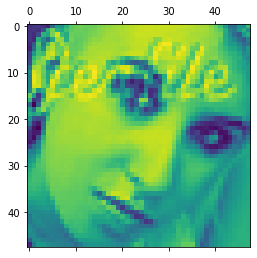

In [27]:
plt.matshow(x_test[4])

In [33]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [34]:
temp = np.array([[0],[1],[2],[3],[4],[5],[6]])
temp

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [35]:
y_test_reshaped = np.dot(y_test,temp)
y_test_reshaped.shape

(7178, 1)

In [36]:
len(y_predicted_labels)
y_predicted_labels_reshaped = np.array(y_predicted_labels)

In [37]:
y_predicted_labels[0:5]
y_predicted_labels_reshaped.shape

(7178,)

In [38]:
cm = tf.math.confusion_matrix(labels=y_test_reshaped,predictions=y_predicted_labels_reshaped)

In [39]:
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[ 382,   14,  132,  130,  167,   36,  124],
       [  11,   50,   10,    9,   10,    0,    6],
       [  87,    4,  434,  140,  190,   67,  111],
       [  20,    0,   58, 1604,   61,   18,   95],
       [  73,    6,  156,  135,  587,   13,  207],
       [  17,    0,   87,   90,   13,  546,   37],
       [  62,    1,  112,  201,  205,   10,  650]])>

In [40]:
!pip install seaborn


Text(69.0, 0.5, 'Truth')

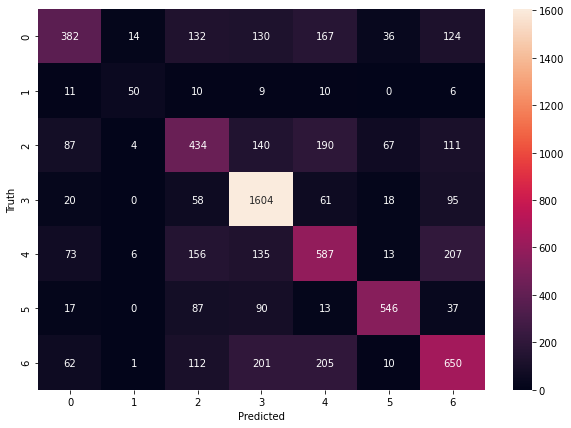

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test_reshaped,y_predicted_labels_reshaped))

              precision    recall  f1-score   support

         0.0       0.59      0.39      0.47       985
         1.0       0.67      0.52      0.58        96
         2.0       0.44      0.42      0.43      1033
         3.0       0.69      0.86      0.77      1856
         4.0       0.48      0.50      0.49      1177
         5.0       0.79      0.69      0.74       790
         6.0       0.53      0.52      0.53      1241

    accuracy                           0.59      7178
   macro avg       0.60      0.56      0.57      7178
weighted avg       0.59      0.59      0.58      7178



ERROR: Could not find a version that satisfies the requirement npconvert (from versions: none)
ERROR: No matching distribution found for npconvert
